# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: Predicting wine quality
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import and process the data

In [2]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200]

# find the columns we want to normalize (all except quality)
# z-score (written out for clarity)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

C:\Users\sayan\AppData\Local\Temp\ipykernel_4492\4017454401.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolQuality'][data['quality']>5] = 1


# Re-organize the data: train/test in DataLoaders

In [3]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()
labels = labels[:,None] # transform to matrix

In [4]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = int(train_data.tensors[0].shape[0]/5)
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [5]:
# check sizes of data batches
for X,y in train_loader:
    print(X.shape,y.shape)

# go back and set drop_last=True in training DataLoader

torch.Size([287, 11]) torch.Size([287, 1])
torch.Size([287, 11]) torch.Size([287, 1])
torch.Size([287, 11]) torch.Size([287, 1])
torch.Size([287, 11]) torch.Size([287, 1])
torch.Size([287, 11]) torch.Size([287, 1])


# Now for the DL part

In [6]:
# create a class for the model

class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(11,16)

        ### hidden layers
        self.fc1 = nn.Linear(16,32)
        self.fc2 = nn.Linear(32,32)

        ### output layer
        self.output = nn.Linear(32,1)

        # define dropout
        self.dropout = nn.Dropout(.25)
  

    # forward pass
    def forward(self,x):
        x = F.relu( self.input(x) )
        x = F.relu( self.fc1(x) )
        x = self.dropout(x)
        x = F.relu( self.fc2(x) )
        x = self.dropout(x)
        return self.output(x)

In [7]:
# generate an instance of the model and inspect it
net = ANNwine()
net

ANNwine(
  (input): Linear(in_features=11, out_features=16, bias=True)
  (fc1): Linear(in_features=16, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [8]:
# A quick test of running some numbers through the model. 
# This simply ensures that the architecture is internally consistent.

# 10 samples, 11 dimensions
tmpx = torch.randn(10,11)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print( y.shape ), print(' ')

# and the output itself
print(y)

torch.Size([10, 1])
 
tensor([[-0.0557],
        [ 0.0377],
        [-0.0585],
        [-0.0290],
        [-0.0440],
        [ 0.1643],
        [ 0.0207],
        [ 0.0209],
        [ 0.0243],
        [-0.0330]], grad_fn=<AddmmBackward0>)


In [9]:
# another sanity-check: run a batch of data through

littleData = next(iter(train_loader))
y = net(littleData[0])
y

tensor([[-0.0444],
        [-0.0040],
        [ 0.0181],
        [-0.0266],
        [ 0.0560],
        [ 0.0277],
        [-0.0190],
        [ 0.0356],
        [ 0.0131],
        [-0.0451],
        [ 0.0356],
        [-0.0379],
        [-0.0155],
        [ 0.0972],
        [-0.0413],
        [-0.0175],
        [-0.0055],
        [ 0.0181],
        [ 0.0356],
        [ 0.0348],
        [ 0.0593],
        [-0.0109],
        [ 0.0060],
        [-0.0667],
        [-0.0556],
        [ 0.0366],
        [ 0.0371],
        [ 0.0162],
        [ 0.0060],
        [-0.0272],
        [ 0.0895],
        [ 0.0492],
        [-0.0076],
        [ 0.0157],
        [ 0.0120],
        [-0.0360],
        [ 0.0487],
        [-0.0007],
        [ 0.0746],
        [-0.0564],
        [ 0.0365],
        [ 0.0563],
        [ 0.0220],
        [-0.0165],
        [ 0.0144],
        [-0.0236],
        [ 0.0057],
        [ 0.0248],
        [-0.0212],
        [-0.0324],
        [-0.0028],
        [-0.0709],
        [-0.

# Train the model

In [10]:
# a function that trains the model

# global parameter
numepochs = 3000

def trainTheModel():

    # loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(winenet.parameters(),lr=.001)

    # initialize losses
    losses   = torch.zeros(numepochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(numepochs):

        # switch on training mode
        winenet.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
        for X,y in train_loader:

            # forward pass and loss
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute training accuracy for this batch
            batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        winenet.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad(): # deactivates autograd
            yHat = winenet(X)
        testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
    # function output
    return trainAcc,testAcc,losses

In [11]:
# create a new model instance
winenet = ANNwine()

# train the model
trainAcc,testAcc,losses = trainTheModel()

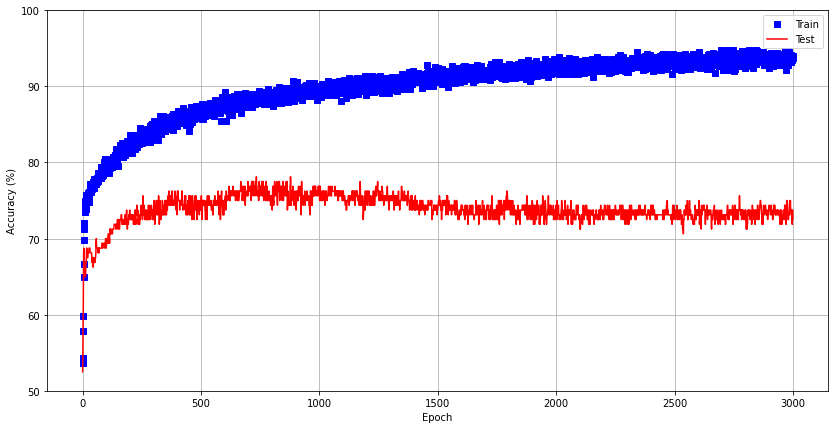

In [12]:
# plot some results
fig = plt.figure(figsize=(14,7))

plt.plot(trainAcc,'bs')
plt.plot(testAcc,'r')
plt.legend(['Train','Test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim([50,100])
plt.grid()
plt.show()